In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from scipy.stats import skew
from scipy.stats import kurtosis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed




Sharpe ratio for the entire period:  0.19848816043099135



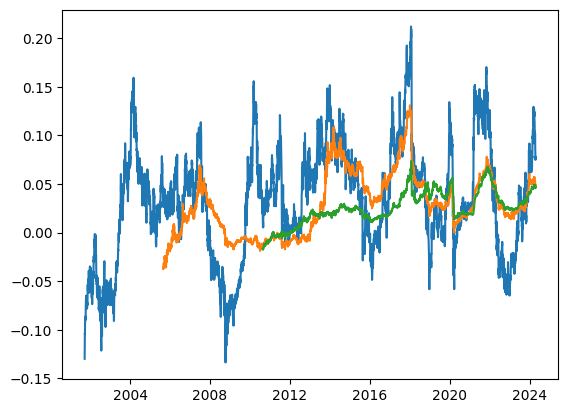

In [ ]:
# 3.2 Python Exercise: Calculating the Sharpe Ratio of S&P 500 Futures with Annualized Data

ticker = 'ES=F'
prices = yf.download(ticker)['Adj Close']

returns = np.log(prices).diff().dropna()

start_date = returns.index[0]

risk_free_rate = (yf.download('^IRX',start=start_date)['Adj Close']/100)/252
# the risk-free rate is already annualized, so we divide by 252

excess_returns = (returns - risk_free_rate).ffill()
# we used ffill to get rid of the NaN that appeared when we subtracted the Rf from the returns

annualized_mean_excess_return = excess_returns.mean()*252

annual_vol = returns.std() * np.sqrt(252)

sharpe_ratio = annualized_mean_excess_return / annual_vol

print()
print()
print('Sharpe ratio for the entire period: ', sharpe_ratio)

# Rolling Sharpe Ratio
  # rolling(252) takes the average or the std of the past 252 days at each point in time
print()
plt.plot(excess_returns.rolling(252).mean()/returns.rolling(252).std())
  # rolling(252*5) does the same, but over 252*5 days. That's why the data starts later (since they need more data to start the average/std)
plt.plot(excess_returns.rolling(252*5).mean()/returns.rolling(252).std())
  # we can sse that for rolling(252*10), the data starts even later
plt.plot(excess_returns.rolling(252*10).mean()/returns.rolling(252).std())
plt.show()

In [ ]:
# 3.3 Python Exercise: Calculating the Sharpe Ratio of 10-Year Treasury Futures with Annualized Data

ticker = 'ZN=F'
prices = yf.download(ticker)['Adj Close']

returns = np.log(prices).diff().dropna()

start_date = returns.index[0]

# Download risk-free rate
risk_free_data = yf.download('^IRX', start=start_date)['Adj Close']
risk_free_rate = risk_free_data/100/252  # Convert to a daily rate

# Align the risk-free rate with the returns index
risk_free_rate = risk_free_rate.reindex(returns.index, method='ffill')

excess_returns = returns - risk_free_rate

annualized_mean_excess_return = excess_returns.mean() * 252
annual_vol = returns.std() * np.sqrt(252)
sharpe_ratio = annualized_mean_excess_return / annual_vol

print()
print()
print('Sharpe Ratio: ', sharpe_ratio)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Sharpe Ratio:  -0.20138374630411138


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed




PORTFOLIO MEASURES OF RETURN AND RISK
Annualized Mean Portfolio Return:  0.032766962287125646
Annualized Portfolio Volatility:  0.11361243756978769
Portfolio Skewness:  -0.2723138476016827
Portfolio Kurtosis:  11.6489262542421
Portfolio Max Drawdown:  0.4769898438534055
Sharpe Ratio:  0.14943923578318666


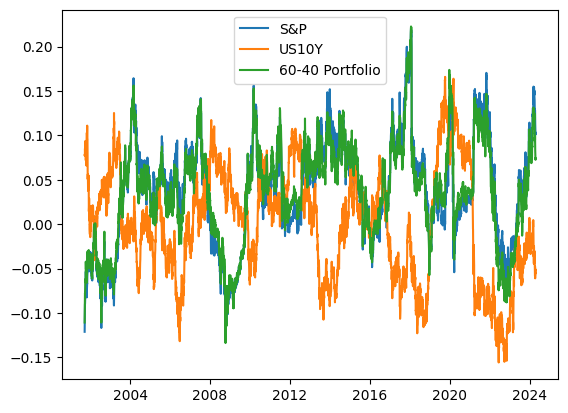

In [ ]:
# Download portfolio data
tickers = ('ES=F', 'ZN=F')
prices = yf.download(tickers)['Adj Close'].ffill()

# Calculate returns and cumulative returns
  # drop NAs in the first lines
returns = np.log(prices).diff().dropna()
cum_sp500_returns = np.exp(returns['ES=F'].cumsum()) - 1
cum_treasuries_returns = np.exp(returns['ZN=F'].cumsum()) - 1

# Build the portfolio and calculate its return and risk measures
weights = [0.6, 0.4]
weighted_returns = returns * weights

portfolio_returns = weighted_returns.sum(axis = 1)  # axis = 1 sums the two columns, axis = 0 would sum the rows
annualized_mean_portfolio_return = portfolio_returns.mean() * 252
cum_portfolio_returns = np.exp(portfolio_returns.cumsum()) - 1
annualized_vol = portfolio_returns.std() * np.sqrt(252)

portfolio_skewness = skew(portfolio_returns)
portfolio_kurtosis = kurtosis(portfolio_returns, fisher=True)
portfolio_ongoing_drawdown = cum_portfolio_returns.cummax() - cum_portfolio_returns
max_portfolio_drawdown = portfolio_ongoing_drawdown.max()

# Download risk_free rate data
start_date = portfolio_returns.index[0]
risk_free_rate = yf.download('^IRX',start=start_date)['Adj Close']/100

# Reindexing risk-free rate data and annualizing it
risk_free_rate_daily = risk_free_rate/252  # daily risk-free rate
risk_free_rate_aligned = risk_free_rate_daily.reindex(portfolio_returns.index).ffill()
annualized_risk_free_rate = risk_free_rate_aligned.mean() * 252  # annualizing the mean risk-free rate

# Calculating Sharpe Ratio
annualized_mean_excess_return = (annualized_mean_portfolio_return - annualized_risk_free_rate)
sharpe_ratio = annualized_mean_excess_return / annualized_vol

print()
print()
print('PORTFOLIO MEASURES OF RETURN AND RISK')
print('Annualized Mean Portfolio Return: ', annualized_mean_portfolio_return)
print('Annualized Portfolio Volatility: ', annualized_vol)
print('Portfolio Skewness: ', portfolio_skewness)
print('Portfolio Kurtosis: ', portfolio_kurtosis)
print('Portfolio Max Drawdown: ', max_portfolio_drawdown)
print('Sharpe Ratio: ', sharpe_ratio)

# Plot the Cumulative Returns and Drawdowns
#plt.plot(cum_portfolio_returns, label = '60-40 Portfolio',linewidth = 1)
#plt.plot(cum_sp500_returns, label = 'S&P 500 Futures', linestyle = 'dashed', linewidth = 1)
#plt.plot(cum_treasuries_returns, label = '10-Year Treasury Futures', linestyle = 'dashed', linewidth = 1)
#plt.fill_between(portfolio_ongoing_drawdown.index, -portfolio_ongoing_drawdown, color = 'red')
#plt.title('Cumulative Returns and Portfolio Drawdown')
#plt.xlabel('Date')
#plt.ylabel('Cumulative Returns')

window = 252
plt.plot(returns['ES=F'].rolling(window).mean()/returns['ES=F'].rolling(window).std(),label = 'S&P')
plt.plot(returns['ZN=F'].rolling(window).mean()/returns['ZN=F'].rolling(window).std(),label = 'US10Y')
plt.plot(portfolio_returns.rolling(window).mean()/portfolio_returns.rolling(window).std(),label = '60-40 Portfolio')

# Display legend and plot
plt.legend()
plt.show()

Calculation: By using pct_change(periods=12), you are calculating the annual inflation rate. This means for each month represented in the DataFrame, the function will compare the CPI of that month to the CPI of the same month a year earlier and compute the percentage difference.

The output will be a new DataFrame or Series (inflation_rate) where each value represents the year-over-year percentage change in CPI. For example, a value of 0.03 means there was a 3% increase in CPI from the same month last year.

In [ ]:
import pandas_datareader as pdr

# Import inflation rate data from FRED using the ‘pandas datareader‘ library
# Specify the data source as 'fred' (Federal Reserve Economic Data)
data_source = 'fred'

# Specify the series ID for the Consumer Price Index for All Urban Consumers (CPIAUCSL)
series_id = 'CPIAUCSL'

# Define the start and end dates for the data
  # We use the portfolio returns from the previous exercise
start_date = '1999-09-22'
  # start_date is 1y before the start date for the portfolio returns, become once we annualize it, the data will start in 2000-09-22

# Fetch the inflation data
inflation_data = pdr.get_data_fred(series_id, start_date)

# Calculate the annualized inflation rate (explanation above)
inflation_rate = inflation_data['CPIAUCSL'].pct_change(periods =12)

# Resample monthly inflation data to daily frequency (forward fill)
inflation_rate = inflation_rate.resample('D').ffill().dropna()

# Calculate inflation-adjusted sharpe ratio
excess_return = (annualized_mean_portfolio_return - inflation_rate.mean())
inflation_adjusted_sharpe_ratio = excess_return / annualized_vol

print('Inflation Adjusted Sharpe Ratio: ', inflation_adjusted_sharpe_ratio)

Inflation Adjusted Sharpe Ratio:  0.062252179901089326


In [ ]:
tickers = ['IVV','VEA','EEM','VNQ','TLT','SCHP']
data = yf.download(tickers,start = '2010-08-05')['Adj Close']

# Initialize a dataframe to keep the returns for each asset
returns = pd.DataFrame(index=data.index)

for ticker in tickers:
  returns[ticker]= np.log(data[ticker]).diff()

returns = returns.dropna()

# Build a portfolio
weights = np.array([0.3, 0.15, 0.05, 0.2, 0.15, 0.15])
weighted_returns = returns * weights
portfolio_returns = weighted_returns.sum(axis = 1)

# Compute annualized return and annualized volatility
annualized_return = portfolio_returns.mean()*252
annualized_vol = portfolio_returns.std() * np.sqrt(252)

# Import inflation rate data from FRED using the ‘pandas datareader‘ library
data_source = 'fred'
series_id = 'CPIAUCSL'
start_date = '2009-08-0'   # 1y before the portfolio data
inflation_data = pdr.get_data_fred(series_id, start_date)

# Calculate the annualized inflation rate
inflation_rate = inflation_data['CPIAUCSL'].pct_change(periods =12)

# Resample monthly inflation data to daily frequency (forward fill )
inflation_rate = inflation_rate.resample('D').ffill()

# Calculate inflation-adjusted sharpe ratio
excess_return = (annualized_return - inflation_rate.mean())
inflation_adjusted_sharpe_ratio = excess_return / annualized_vol

print()
print()
print('Inflation Adjusted Sharpe Ratio: ', inflation_adjusted_sharpe_ratio)

[*********************100%%**********************]  6 of 6 completed




Inflation Adjusted Sharpe Ratio:  0.35648565016930805
